## Curva solución sin tener solución
### Juan S. Hincapié - Carlos Duque-Daza


### Ecuaciones autónomas de primer orden

<div align='justify'> Ahora necesitamos repasar brevemente una tipo de clasificación de las ecuaciones diferenciales ordinarias de particular importancia para la investigación cualitativa de estas. Una ecuación diferencial ordinaria en la que la variable independiente no aparece explícitamente se llama autónoma. Si el símbolo $x$ denota a la variable independiente, entonces se puede escribir una ecuación diferencial autónoma de primer orden como: </div>

$$
    \frac{dy}{dx} = f(y)
$$

$$
    \frac{dy}{dx} = 1 + 2y + y^2 ~\text{es autónoma}
$$

$$
    \frac{dy}{dx} = 1 + 2y + xy^2~\text{es NO autónoma}
$$

### Puntos críticos

<div align='justify'>Las raíces de la función $f$ de la edo autónoma son de especial importancia. Decimos que un número real c es un <b>punto crítico</b> de la ecuación diferencial autónoma si es una raíz de $f$, es decir, $f(c)=0$. Un punto crítico también se llama <b>punto de equilibrio</b> o <b>punto estacionario</b>. Por medio de los puntos críticos, podemos identificar en qué rangos del eje vertical $y$ la función crece o decrece. Esto se hace simplemente identificando el signo de $dy/dx$ por encima y por debajo del punto de equilibrio</div>

**Ejemplo 03:** Identifique el número de puntos de equilibro en el Modelo de Logístico:

$$
    \frac{dP}{dt} = rP\left(1-\frac{P}{K} \right)
$$

Donde $K$, la constante de capacidad de soporte de población para el sistema es igual a $10$ y $r = 5$

* Primero debemos encontrar las raíces de la edo autónoma:

$$
 P = K ~\text{y}~ P = 0 
$$

* Luego, debemos encontrar el signo de $dP/dt$ por encima y por debajo de los puntos críticos encontrado. Para este fin, es bastante útil hacer una tabla (o diagrama de fase):

| Intervalo | Signo de $f(P)$ | P(t) | 
| --- | --- |  --- | 
| $(-\infty, 0)$ | - |  Decreciente | 
| $(0, K)$ | + |  Creciente |
| $(K, \infty)$ | - | Decreciente |


In [20]:
import numpy as np
import matplotlib.pyplot as plt

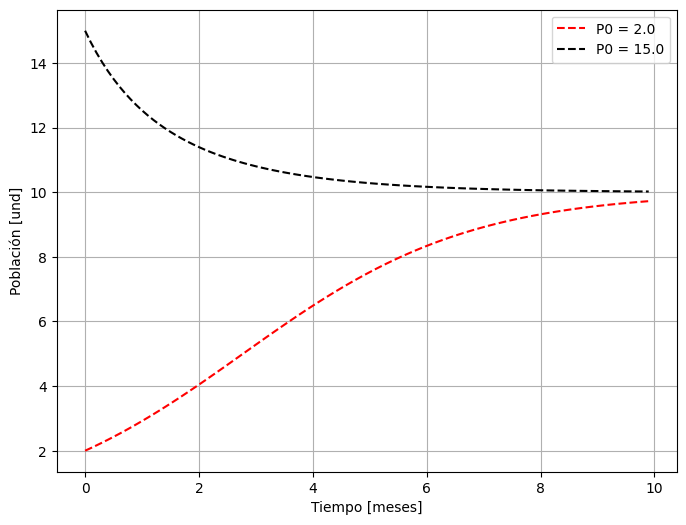

In [21]:
# Paso 00: definir función que contenga la solución analítica
solucAnalitica = lambda K, P0, r, t:K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1))

# Paso 01: tiempo de simulación
tiempo = np.arange(0, 10, 0.1)

# Paso 02: parámetros del modelo
K = 10
r = 0.5
P01 = 2
P02 = 15

# Paso 03: generar solución para dos casos
P1 = solucAnalitica(K, P01, r, tiempo)
P2 = solucAnalitica(K, P02, r, tiempo)

# Paso 04: graficar
plt.figure(1, figsize=(8,6))
plt.plot(tiempo, P1, "--r", label = "P0 = {:.1f}".format(P01))
plt.plot(tiempo, P2, "--k", label = "P0 = {:.1f}".format(P02))
plt.xlabel("Tiempo [meses]")
plt.ylabel("Población [und]")
plt.grid()
plt.legend()

* ¿Cón qué parámetros "controlo" el crecimiento o decrecimiento de la población? Prueba difrentes valores de $P_0$ y de $K$
* ¿Por qué cree que el parámetros $1/r$ se le puede considerar como un tiempo característico del sistema?
* ¿Podría dibujar el campo direccional en el gráfico anterior?
* ¿Cómo podríamos categorizar los dos puntos críticos? ¿Cuál sería el atractor y cuál sería el repulsor?

**Ejercicio 01:** Graficar el campo dirección encima de las dos soluciones recien encontradas. ¿La solución se adapata al campo vectorial?

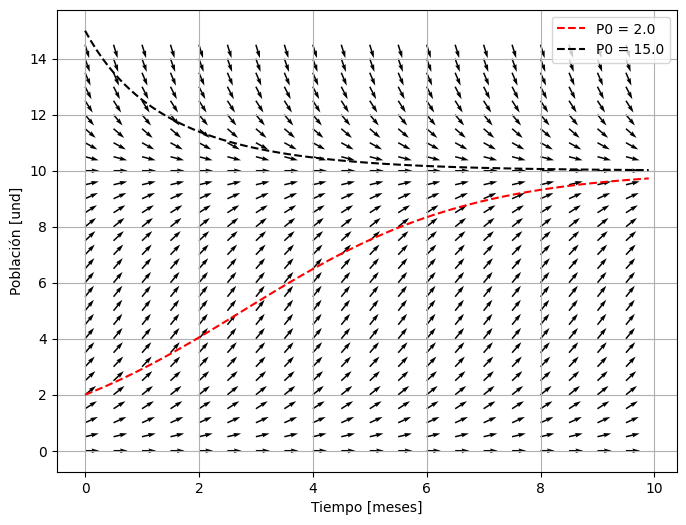

In [24]:
pdir = np.arange(0, 15, 0.5)
tdir = np.arange(0, 10, 0.5)

pendP = lambda r, P, K: r*P*(1-P/K)

meshP, meshT = np.meshgrid(pdir, tdir)

dp = pendP(r, meshP, K)
dt = np.ones(meshT.shape)

dpn = dp/(np.sqrt(dp**2+dt**2))
dtn = dt/(np.sqrt(dp**2+dt**2))

plt.figure(2, figsize=(8,6))
plt.quiver(meshT,meshP,dtn,dpn)
plt.plot(tiempo, P1, "--r", label = "P0 = {:.1f}".format(P01))
plt.plot(tiempo, P2, "--k", label = "P0 = {:.1f}".format(P02))
plt.xlabel("Tiempo [meses]")
plt.ylabel("Población [und]")
plt.grid()
plt.legend()


### Sistemas autónomos

Supongamos un sistema autónomo plano:

$$
    \frac{dx}{dt} = P(x,y)
$$
$$
    \frac{dy}{dt} = Q(x,y)
$$

<div align='justify'>El vector $\mathbf{V}(x,y) = (P(x,y), Q(x,y))$ define un **campo vectorial** en una región del plano bidimensional, y una de las posibles soluciones al sistema puede interpretarse como la trayectoria que recorre un partícula al ser depositada en dicha región. Por ejemplo, considermos el siguiente sistema:</div>

$$
\begin{aligned}
& \frac{d x}{d t}=V_0\left(1-\frac{x^2-y^2}{\left(x^2+y^2\right)^2}\right) \\
& \frac{d y}{d t}=V_0 \frac{-2 x y}{\left(x^2+y^2\right)^2}
\end{aligned}
$$

Por lo tanto, 

$$
\mathbf{V}(x, y)=V_0\left(1-\frac{x^2-y^2}{\left(x^2+y^2\right)^2}, \frac{-2 x y}{\left(x^2+y^2\right)^2}\right)
$$

In [29]:
# Paso 00: crear las funciones que contienen las pendientes
pendX = lambda x, y, V0: V0*(1-(x**2-y**2)/(x**2+y**2)**2)
pendY = lambda x, y, V0: V0*((-2*x*y)/(x**2+y**2)**2)

# Paso 01: definir coordenadas en X y en Y
coordX = np.arange(-3, 3, 0.3)
coordY = np.arange(-3, 3, 0.3)

# Paso 02: crear matrices con coordenas de los puntos
X,Y = np.meshgrid(coordX,coordY)

# Paso 03: obtener el valor de la derivadas en cada uno de los puntos
dx = pendX(X, Y, 2)
dy = pendY(X, Y, 2)

# Paso 04: normalizar los vectores
dxu = dx/(np.sqrt(dx**2+dy**2))
dyu = dy/(np.sqrt(dx**2+dy**2))

# Paso 05: definir función que ejecuta Euler hacia adelante
def eulerF(x0, y0, V0, dt, tiempo):
    posX = np.zeros(len(tiempo))
    posY = np.zeros(len(tiempo))

    posX[0] = x0
    posY[0] = y0

    for i in range(len(tiempo)-1):
        posX[i+1] = posX[i] + dt*pendX(posX[i], posY[i], V0)
        posY[i+1] = posY[i] + dt*pendY(posX[i], posY[i], V0)

    return posX, posY

# Paso 06: condiciones iniciales y parámetros temporales
x0 = -2; y0 = -0.5; dt = 0.1; tf = 10; V0 = 2 
tiempo = np.arange(0, tf+dt,dt)

# Paso 07: llamar la función para resolver el sistema
posX, posY = eulerF(x0, y0, V0, dt, tiempo)


**Recuerde** que para dibujar la trayectoria, se debe graficar las dos variables, una vs la otra, y no la variable vs el tiempo.

<Figure size 640x480 with 0 Axes>

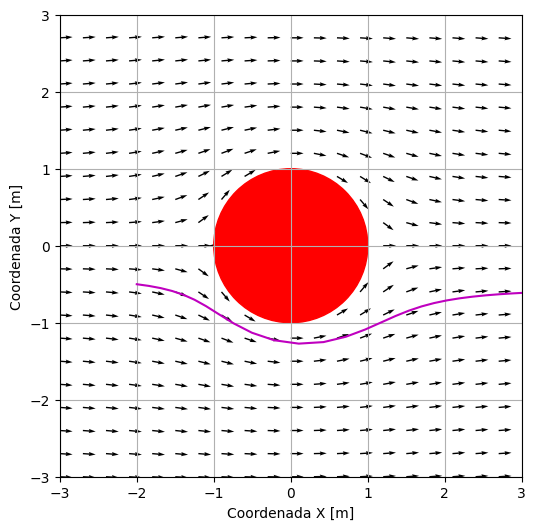

In [30]:
# Paso 08: graficar el campo vectorial, la trayectoria, y el círculo de 1.0 radio
fig1 = plt.figure(1)
fig1, axes = plt.subplots(1,1, figsize=(8,6))
axes.quiver(X, Y, dxu, dyu)
circle01 = plt.Circle((0, 0), 1.0, color='r')
axes.plot(posX, posY, "-m")
axes.set_xlabel("Coordenada X [m]")
axes.set_ylabel("Coordenada Y [m]")
axes.set_xlim((-3,3))
axes.set_ylim((-3,3))
axes.add_artist( circle01 )
axes.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

La trayectoria de la partícula es una solución del sistema dinámico, que satisfaces la condición inicial $\mathbf{X}(0) = (x_0, y_0)$

* ¿Cuáles deberían ser las condiciones iniciales para la curva solución pase por debajo del cilindro?

**Ejercicio 02:** verifique el tipo de trayectoria que se genera con el siguiente sistema de ecuaciones diferenciales plano:

$$
\begin{aligned}
& \frac{d x}{d t}= 2x + 8y \\
& \frac{d y}{d t}= -x -2y
\end{aligned}
$$

**Tip:** si está usando el método de Euler hacia adelante, emplear un paso de tiempo relativamente pequeño, como por ejemplo 1e-04.

* ¿Qué puede observar de la trayectoria? ¿Cómo la llamaría?
* ¿Qué ocurre si la condición inicial es $\mathbf{X}(0) = (0,0)$?



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

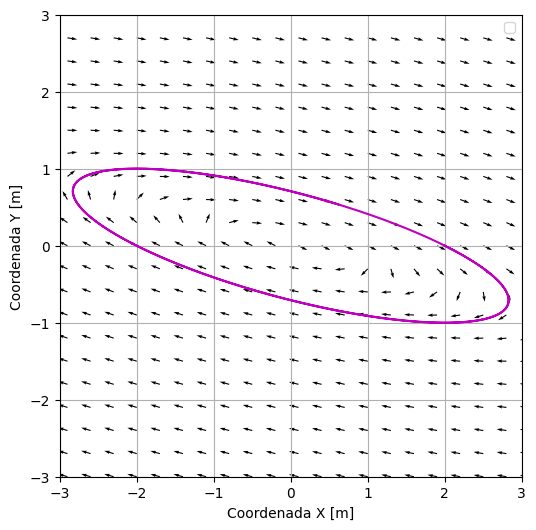

In [65]:
# Paso 00: crear las funciones que contienen las pendientes

# Paso 01: definir coordenadas en X y en Y

# Paso 02: crear matrices con coordenas de los puntos

# Paso 03: obtener el valor de la derivadas en cada uno de los puntos

# Paso 04: normalizar los vectores

# Paso 05: definir función que ejecuta Euler hacia adelante

# Paso 06: condiciones iniciales y parámetros temporales

# Paso 07: llamar la función para resolver el sistema


fig2 = plt.figure(2)


### Análisis de estabilidad

Pudimos comprobar que un sistema autónomo plano 

$$
\begin{aligned}
& \frac{dx}{dt} = P(x,y) \\
& \frac{dy}{dt} = Q(x,y)
\end{aligned}
$$

<div align='justify'>origina un campo vectorial $\mathbf{V}(x,y) = (P(x,y), Q(x,y))$ y que una posible solución $\mathbf{X}=\mathbf{X}(t)$ se puede entender como la trayectoria que una partícula traza después de ser colocada en una posición inicial $\mathbf{X}(0)=\mathbf{X}_0$. Si por casualidad la condición inicial $\mathbf{X}_0$ es un punto crítico, entonces la partícula permance en reposo. </div>

nos interesan las respuestas de las siguientes preguntas, cuando $\mathbf{X_0}$ está cerca de $\mathbf{X_{crit}}$

1. ¿Regresará la partícula al punto crítico?
1. Si la partícula no regresa al punto crítico, ¿permanece cerca de él o
se aleja? 


<div align='justify'>Introduciré un par de casos de estabilidad por medio del siguiente ejemplo.</div>

$$
\begin{aligned}
& \frac{dx}{dt} = -x + y \\
& \frac{dy}{dt} = cx - y
\end{aligned}
$$

Lo primero que debemos hacer es calcular los autovalores del sistema. En resumidas cuentas nos da:

$$
    \lambda_1, \lambda_2 = -1 \pm \sqrt{c}
$$

Donde la naturaleza de los autovalores está definida por el signo de $c$.


In [86]:
# Paso 00: crear las funciones que contienen las pendientes
pendX = lambda x, y: -x + y
pendY = lambda x, y, c: c*x - y

# Paso 01: definir función que ejecuta Euler hacia adelante
def eulerF(x0, y0, dt, tiempo, c):
    posX = np.zeros(len(tiempo))
    posY = np.zeros(len(tiempo))

    posX[0] = x0
    posY[0] = y0

    for i in range(len(tiempo)-1):
        posX[i+1] = posX[i] + dt*pendX(posX[i], posY[i])
        posY[i+1] = posY[i] + dt*pendY(posX[i], posY[i], c)

    return posX, posY

# Paso 02: definir función que calcula insumos para el campo vectorial
def vectorField(c):
    # Paso 03: definir coordenadas en X y en Y
    coordX = np.arange(-1.5, 1.5, 0.1)
    coordY = np.arange(-1.5, 1.5, 0.1)

    # Paso 04: crear matrices con coordenas de los puntos
    X,Y = np.meshgrid(coordX,coordY)

    # Paso 05: obtener el valor de la derivadas en cada uno de los puntos
    dx = pendX(X, Y)
    dy = pendY(X, Y, c)

    # Paso 06: normalizar los vectores
    dxu = dx/np.sqrt(dx**2+dy**2)
    dyu = dy/np.sqrt(dx**2+dy**2)

    return X, Y, dxu, dyu



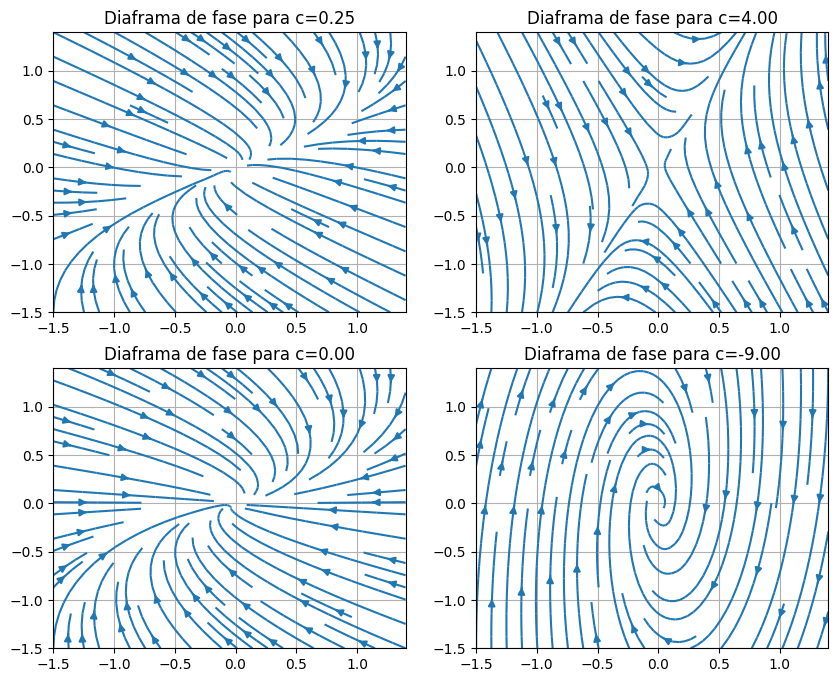

In [90]:
# Paso 07: condiciones iniciales y parámetros temporales
x0 = 0.5; y0 = 0.5; dt = 0.001; tf = 6; c = np.array([1/4, 4.0, 0.0, -9.0])
tiempo = np.arange(0, tf+dt,dt)

fig, axs = plt.subplots(2, 2, figsize=(10,8))
count = 0
for i in range(2):
    for j in range(2):
        X, Y, dxu, dyu = vectorField(c[count])
        axs[i, j].streamplot(X, Y, dxu, dyu, density = 0.8)
        axs[i, j].set_title('Diaframa de fase para c={:.2f}'.format(c[count]))
        axs[i, j].grid()
        count += 1



* ¿Cuánto valen los autovalores para cada uno de valores que toma $c$?

### Caso I: autovalores reales y distintos
1. Si ambos autovalores son negativos, decimos que el punto crítico es estable.
1. Si ambos autovalores son positivos, decimos que el punto crítico es inestable.
1. Si los autovalores tienen diferentes signos, decimos que el punto crítico es un punto de silla.

### Caso II: un autovalor repetido
1. Si el autovalor es negativo, decimos que el puntos crítico se llama nodo estable degenerado.
1. Si el autovalor es positivo, decimos que el puntos crítico se llama nodo inestable degenerado.

### Caso III: autovalores complejos
1. Si los autovalores son imaginarios puros, decimos que el puntos crítico se centro, y las curvas solución se moveran alrededor sin acercarse y sin alejarse.
1. Si la parte real del autovalor es negativo, decimos que el puntos crítico se llama espiral estable.
1. Si la parte real del autovalor es positivo, decimos que el puntos crítico se llama espiral inestable.

**Ejercicio 03:** evalue la estabilidad de los siguientes sistemas y trace una curva solución.

*
$$
\mathbf{A}=\left(\begin{array}{rr}
3 & -18 \\
2 & -9
\end{array}\right)
$$

*
$$
\mathbf{B}=\left(\begin{array}{rr}
-1 & 2 \\
-1 & 1
\end{array}\right)
$$

*
$$
\mathbf{C}=\left(\begin{array}{rr}
-10 & 6 \\
15 & -19
\end{array}\right)
$$

Se pueden ayudar de la siguiente herramienta https://www.geogebra.org/m/Da6WsuXk para verificar los resultados

In [7]:
A = np.array([[3,-18],[2,-9]])

eigValues, eigVect = np.linalg.eig(A) 
print("Los autovalores son:" ,eigValues)

Los autovalores son: [-3. -3.]
